## Introduction
An API (Application Programming Interface) is a set of protocols and tools for building software applications. It acts as a bridge that allows different software programs to communicate with each other. APIs define the methods and data formats that developers can use to interact with the software components, whether they are part of the same system or belong to external services. For instance, when you use an app on your phone to check the weather, the app uses an API to request data from a remote server. The API handles this interaction, ensuring that the app can display the information without needing to understand the details of how the server retrieves the weather data. APIs are essential in modern software development, enabling seamless integration and function sharing across diverse platforms and services.

## API: Pandas
Pandas, a popular Python library, is often mistaken for an API due to its interface-like features enabling data manipulation. Technically, it's not an API in the sense of a web API that allows communication between different software systems over the internet. Instead, Pandas provides a well-defined set of functions and methods—akin to an API—for operating on data structures. It streamlines tasks related to data analysis, like reading, filtering, and aggregating large datasets, making it a powerful tool in a data scientist's toolkit. So, while not an API for remote services, Pandas serves as an application interface within Python for efficient data handling.

In [1]:
import pandas as pd # Import Pandas
import matplotlib.pyplot as plt

In [2]:
# Constructing a new dictionary with sample data.
dict_data = {'col1': [10, 20, 30], 'col2': [40, 50, 60]}

# Creating a DataFrame from the dictionary using Pandas.
my_dataframe  = pd.DataFrame(dict_data)

# Displaying the type of the newly created DataFrame.
type(my_dataframe )

pandas.core.frame.DataFrame

When we initiate a DataFrame in Pandas using a constructor, it's akin to creating what's called an "instance" in programming terminology. The information from the dictionary is transferred into the Pandas DataFrame structure. This DataFrame instance now allows for interaction with the comprehensive set of functionalities provided by the Pandas library, which can be thought of as its own Application Programming Interface (API) for data manipulation within Python.

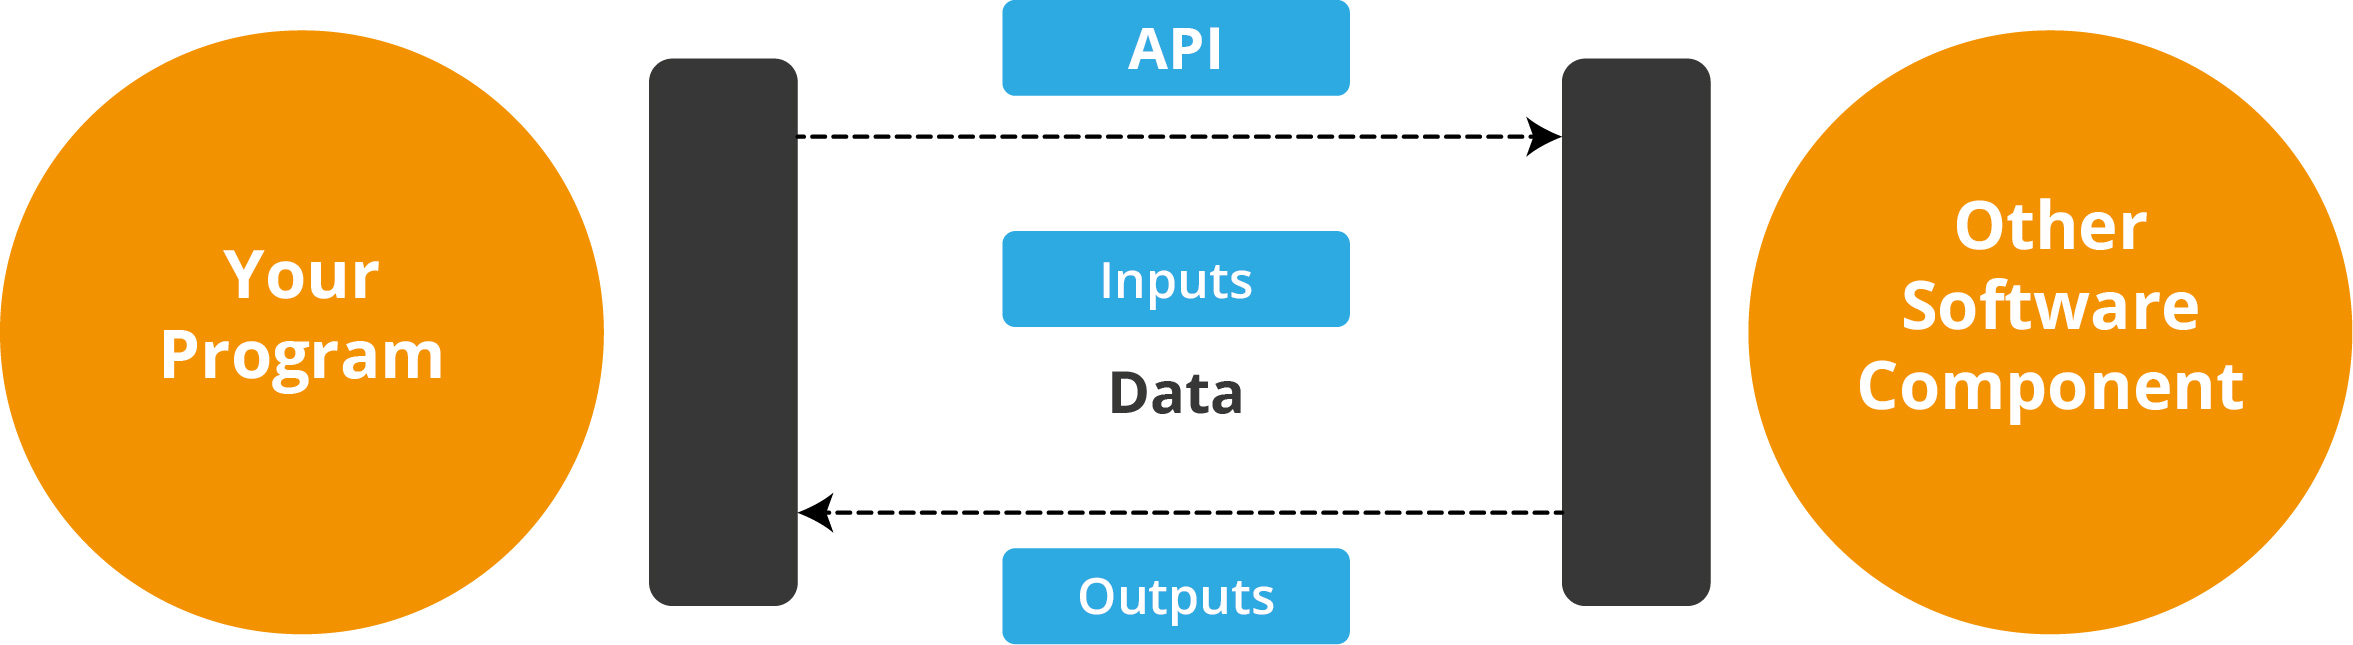

When utilizing Pandas methods, such as .head(), it allows the Python program to interact with the DataFrame akin to a conversation with an API, showing the initial rows:

In [3]:
# Displaying the first few rows of the DataFrame.
my_dataframe.head()

,col1,col2
0,10,40
1,20,50
2,30,60


Calculating the mean of each column in the DataFrame. Calling the API with mean() calcuates the mean and return the value.



In [4]:
# Calculating the mean of each column in the DataFrame.
my_dataframe.mean()

col1    20.0
col2    50.0
dtype: float64

## REST APIs
REST APIs operate by exchanging requests and responses through HTTP messages. These messages often include a JSON payload with commands specifying the desired action on a service or resource. Similarly, the API sends back an HTTP response, typically encapsulated in a JSON, detailing the outcome of the request.

In our exercise, we'll leverage the NBA API to assess the Golden State Warriors' performance against the Toronto Raptors by calculating the point differential for each game. Positive values signify a win by that many points, while negative values indicate a loss by the corresponding number. The API abstracts complexities such as managing endpoints and handling authentication.

Using the [**NBA API**](https://pypi.org/project/nba_api/) is straightforward when requesting data for a specific team; we need only the team's ID. Unlike some APIs that require a JSON payload for requests, the NBA API stores this information internally and is accessible through a simple team ID. To begin, we import the `teams` module from the API's library.

In [5]:
!pip install nba_api
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 4.7 MB/s eta 0:00:00


In [6]:
def one_dict(list_dict):
    """
    Transforms a list of dictionaries into a single dictionary with each key holding a list of values.
    
    Args:
    list_dict (list of dict): A list where each element is a dictionary with the same keys.
    
    Returns:
    dict: A dictionary where each key from the original dictionaries maps to a list of values from all dictionaries in the list.
    """
    
    # Assuming all dictionaries in the list have the same keys,
    # we take the keys from the first dictionary.
    keys = list_dict[0].keys()
    
    # Create a new dictionary where each key from the original dictionaries
    # maps to an empty list, preparing to hold all corresponding values.
    out_dict = {key: [] for key in keys}
    
    # Loop through each dictionary in the list.
    for dict_ in list_dict:
        # Loop through each key-value pair in the current dictionary.
        for key, value in dict_.items():
            # Append the value to the appropriate list in the new dictionary based on the key.
            out_dict[key].append(value)
    
    # Return the newly constructed dictionary with lists of values.
    return out_dict

In [7]:
"""
The code snippet `nba_teams = teams.get_teams()`
likely represents a call to a function within a
Python library related to the NBA API, which retrieves
a list of NBA teams. When you run this line of code,
the `get_teams()` function communicates with the NBA API,
requesting data for all NBA teams. The response, which is
handled internally by the API, is then stored in the variable
`nba_teams`. This variable now contains a list of dictionaries,
each representing a team and its details, such as the team's ID, full name,
abbreviation, city, and other relevant information that the API provides.
"""

nba_teams = teams.get_teams()

In [8]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

To streamline the process, we can transform the dictionary into a tabular format. By applying the `one_dict` function, we create a new dictionary with common keys across all teams, where each key's value is a comprehensive list containing specific team information. This dictionary is then converted into a DataFrame, with each row representing a different team's data.

In [9]:
# Convert a list of dictionaries (nba_teams) into a single dictionary with aggregated lists of values.
dict_nba_team = one_dict(nba_teams)
df_teams = pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [10]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [11]:
id_warriors=df_warriors[['id']].values[0][0]
# we now have an integer that can be used to request the Warriors information 
id_warriors

1610612744

The code from nba_api.stats.endpoints import leaguegamefinder is a Python import statement. It imports the leaguegamefinder class from the nba_api.stats.endpoints module of the nba_api package. This class can be used to query NBA statistical data, such as game results, player statistics, and team performance, among other data points. The leaguegamefinder function is particularly useful for finding games that match certain criteria.

In [12]:
from nba_api.stats.endpoints import leaguegamefinder

The `team_id_nullable` parameter specifies the unique identifier for the Warriors. Internally, the NBA API performs an HTTP request using this ID. The data retrieved in response to this request is encapsulated in an HTTP response and assigned to the `game_finder` object.

In [13]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

In [14]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# Print the json file as follows:

# gamefinder.get_json()

# It is very big so I am commenting it here, you can run and see the output

The `game_finder` object includes a `get_data_frames()` method that outputs a DataFrame. This DataFrame holds details on all the games played by the Warriors, including outcomes. The `PLUS_MINUS` column indicates the point differential; negative values denote losses by that margin, while positive ones signify wins. The `MATCHUP` column shows the opponent, with "GSW" representing the Golden State Warriors and "TOR" for the Toronto Raptors. The presence of "vs" indicates a home game, whereas "@" symbolizes an away game.

In [15]:
# Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.

games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612744,GSW,Golden State Warriors,0022300811,2024-02-23,GSW vs. CHA,W,238,97,...,0.800,13.0,40.0,53.0,28,7,7,21,15,13.0
1,22023,1610612744,GSW,Golden State Warriors,0022300802,2024-02-22,GSW vs. LAL,W,241,128,...,0.857,15.0,33.0,48.0,32,6,4,9,19,18.0
2,22023,1610612744,GSW,Golden State Warriors,0022300576,2024-02-15,GSW @ UTA,W,239,140,...,0.786,13.0,28.0,41.0,42,8,6,13,19,3.0
3,22023,1610612744,GSW,Golden State Warriors,0022300789,2024-02-14,GSW vs. LAC,L,240,125,...,0.722,13.0,34.0,47.0,34,7,2,9,25,-5.0
4,22023,1610612744,GSW,Golden State Warriors,0022300769,2024-02-12,GSW @ UTA,W,239,129,...,0.765,12.0,39.0,51.0,31,8,4,13,13,22.0


We can download the dataframe from the API call for Golden State and run the rest like a video.

In [16]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

# Function to download a file from a given URL.
def download(url, filename):
    response = requests.get(url)  # Make HTTP GET request to the URL.
    if response.status_code == 200:  # Check if request was successful.
        with open(filename, "wb") as f:  # Open file in binary-write mode.
            f.write(response.content)  # Write the content of the response to a file.

download(filename, "Golden_State.pkl")  # Call the download function.

In [17]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


We can generate two DataFrames: one detailing the Warriors' home games against the Raptors, and another for their away games.

In [18]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

Calculate the mean for the column PLUS_MINUS for the dataframes games_home and  games_away:

In [19]:
games_home['PLUS_MINUS'].mean()

3.730769230769231

In [20]:
games_away['PLUS_MINUS'].mean()

-0.6071428571428571

Plot out the PLUS MINUS column for the dataframes games_home and  games_away. We see the warriors played better at home.

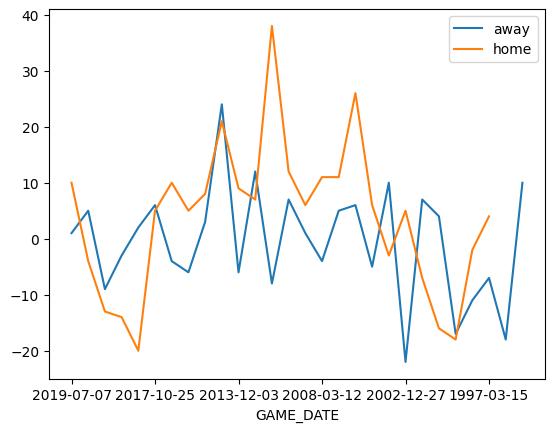

In [21]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

### Please check the following notes to know more about APIs
- [Introduction to APIs: How API Work? | Structures of API | PART 1](https://www.kaggle.com/discussions/general/479591)
- Part 2 is coming soon

Please stay tuned!! Thanks!

Special thanks to who is the original author ([Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/)) of this tutorial. Here I just trid to present it with a better explaination.